In [34]:
import gurobipy as gp
from gurobipy import GRB
import sys

# Data Processing
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt


In [23]:
tabla_final = pd.read_csv('Resultados_Boosting_Tree.csv', sep = ",")
tabla_final = tabla_final[["ID_CLIENTE","probabilidad_de_aceptar"]]
print(tabla_final)

        ID_CLIENTE  probabilidad_de_aceptar
0        1375586.0                 0.024083
1        1050612.0                 0.003222
2        1050613.0                 0.002569
3        1050615.0                -0.001019
4        1050616.0                 0.002581
...            ...                      ...
602555    899549.0                 0.035544
602556   1441442.0                 0.027612
602557   1454431.0                -0.000314
602558     56812.0                 0.019501
602559    981034.0                 0.034644

[602560 rows x 2 columns]


In [24]:
array_cliente_probabilidad = tabla_final.to_numpy()
array_cliente_probabilidad = array_cliente_probabilidad.tolist()

In [25]:
# Crear un objeto de modelo de Gurobi
model = gp.Model()

In [26]:
# Conjuntos del modelo

I = array_cliente_probabilidad #Conjunto de personas preaprobadas

In [27]:
# Obtenemos las cardinalidades de cada conjunto
car_i = len(I)

In [28]:
p = list() # puntaje de posibilidad de la adquisición de una tarjeta de crédito para la persona preaprobada i.
for i in range(car_i):
    p.append(array_cliente_probabilidad[i][1])
U = 29587 #utilidades generadas por una persona
CPA_base = 8238

In [29]:
# Creamos las variables de decisión

e = model.addVars(car_i, vtype=GRB.BINARY, name="e")  # 1 si a la persona se le envia cualquier tipo de publicidad, 0 en otro caso.

In [30]:
resultados = []
for i in range (1000,602559, 10000):
    model = gp.Model()
    e = model.addVars(car_i, vtype=GRB.BINARY, name="e") 
    C = i
    # Cobertura fija
    model.addConstr(gp.quicksum(e[i] for i in range(car_i)) == C, "c1")
    # CPA < Ingreso
    model.addConstr(((gp.quicksum(e[i] * p[i] for i in range(car_i)))/(C)) >= (U/123.36)**(1/-0.994), "c2")
    model.setObjective((gp.quicksum(e[i] * p[i] for i in range(car_i)))/(C), sense=GRB.MAXIMIZE)
    model.optimize()
    resultados.append(model.objVal)


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8300H CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 602560 columns and 1205120 nonzeros
Model fingerprint: 0x3515df10
Variable types: 0 continuous, 602560 integer (602560 binary)
Coefficient statistics:
  Matrix range     [2e-11, 1e+00]
  Objective range  [2e-11, 1e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e-03, 1e+03]
Found heuristic solution: objective 0.0764356
Presolve removed 0 rows and 460490 columns
Presolve time: 1.20s
Presolved: 2 rows, 142070 columns, 284133 nonzeros
Variable types: 0 continuous, 142070 integer (80502 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity     -4.4468014e+01      2s
       1          1   6.8320625e+10  -2.2343166e+01      2s
  

In [33]:
lista_valores = list(range(1000, 602560, 10000))

In [68]:
resultados

[0.7750984553974966,
 0.678545800661093,
 0.6335998980628794,
 0.5917739012509128,
 0.5446222077328582,
 0.5020519956366363,
 0.4627726568631306,
 0.423937452664138,
 0.3867141822123208,
 0.353959410498608,
 0.3267586475179017,
 0.30386939224748255,
 0.2844304104677276,
 0.2677123167631321,
 0.253181834532531,
 0.24036659886522668,
 0.22895392329263214,
 0.2187009404469134,
 0.20943222413294577,
 0.20100410676898767,
 0.19329321032214553,
 0.18619411875251568,
 0.1796357341324539,
 0.17356066528911224,
 0.16790466960639477,
 0.16263395550563925,
 0.15770548372919319,
 0.15066053512249936,
 0.14636951402861456,
 0.14195439152711523,
 0.13811051546446934,
 0.13421620772929488,
 0.13064418202675193,
 0.12660330511036474,
 0.12373292790916382,
 0.11987752073879294,
 0.11723331486104649,
 0.11371764651695845,
 0.1110205972344447,
 0.10864630308604191,
 0.10648279837889321,
 0.10375214799041746,
 0.10130349456876635,
 0.09937758952387268,
 0.09772285766652986,
 0.0955067941506653,
 0.0938258

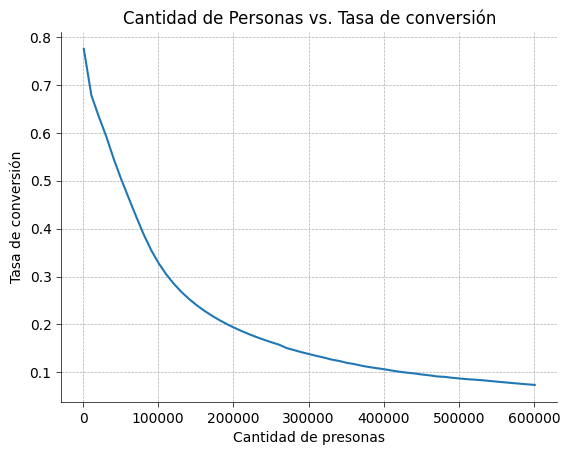

In [91]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Trazar los datos
ax.plot(lista_valores, resultados)

# Configurar estilo
ax.spines['top'].set_visible(False)  # Ocultar borde superior
ax.spines['right'].set_visible(False)  # Ocultar borde derecho
ax.spines['bottom'].set_linewidth(0.5)  # Grosor del borde inferior
ax.spines['left'].set_linewidth(0.5)  # Grosor del borde izquierdo
ax.tick_params(width=0.5)  # Grosor de las marcas en los ejes
ax.grid(linestyle='--', linewidth=0.5)  # Agregar líneas de cuadrícula

# Etiquetas de los ejes y título
ax.set_xlabel('Cantidad de presonas')
ax.set_ylabel('Tasa de conversión')
ax.set_title('Cantidad de Personas vs. Tasa de conversión')

# Mostrar el gráfico
plt.show()

In [96]:
cambio_a_utilidad = []
for i in range (len(resultados)):
    cantidad = lista_valores[i]
    cambio_a_utilidad.append((123.36*(resultados[i]-0.07)**(-0.994)))

cambio_a_utilidad

31429.53375893055

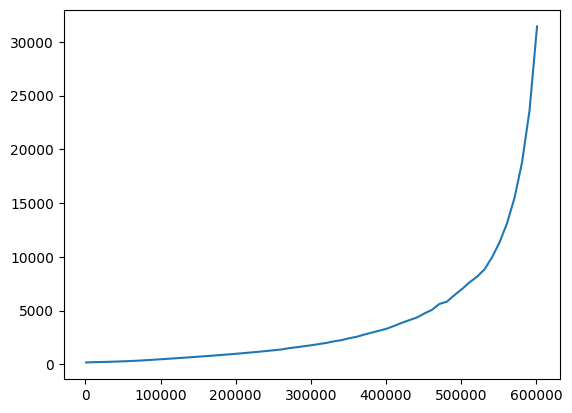

In [97]:
fig, ax = plt.subplots()
ax.plot(lista_valores, cambio_a_utilidad)
plt.show()

In [116]:
cambio_a_utilidad = []
for i in range (len(resultados)):
    cantidad = lista_valores[i]
    cambio_a_utilidad.append(U*resultados[i]*cantidad-(123.36*(resultados[i]-0.07)**(-0.994)) * resultados[i]*cantidad)


cambio_a_utilidad[cambio_a_utilidad.index(max(cambio_a_utilidad))]

1160779473.7496514

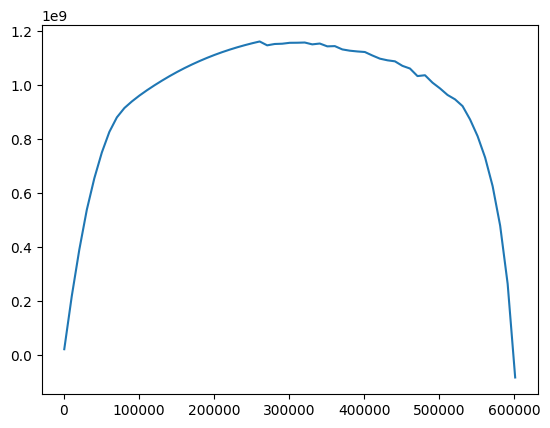

In [101]:
fig, ax = plt.subplots()
ax.plot(lista_valores, cambio_a_utilidad)
plt.show()

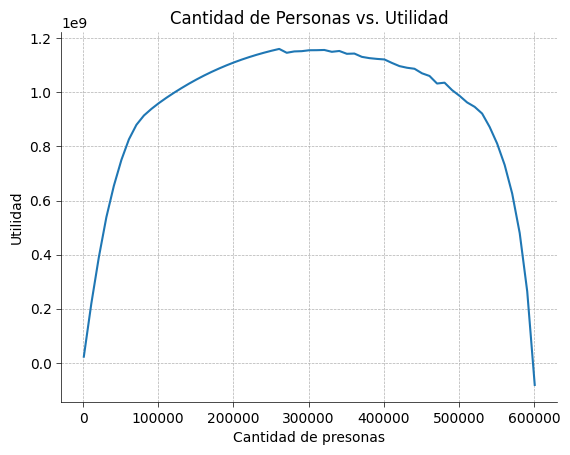

In [89]:

# Crear figura y ejes
fig, ax = plt.subplots()

# Trazar los datos
ax.plot(lista_valores, cambio_a_utilidad)

# Configurar estilo
ax.spines['top'].set_visible(False)  # Ocultar borde superior
ax.spines['right'].set_visible(False)  # Ocultar borde derecho
ax.spines['bottom'].set_linewidth(0.5)  # Grosor del borde inferior
ax.spines['left'].set_linewidth(0.5)  # Grosor del borde izquierdo
ax.tick_params(width=0.5)  # Grosor de las marcas en los ejes
ax.grid(linestyle='--', linewidth=0.5)  # Agregar líneas de cuadrícula

# Etiquetas de los ejes y título
ax.set_xlabel('Cantidad de presonas')
ax.set_ylabel('Utilidad')
ax.set_title('Cantidad de Personas vs. Utilidad')

# Mostrar el gráfico
plt.show()

In [109]:
#Usamos el C con utilidad maxima
conversion_optimo = resultados[cambio_a_utilidad.index(max(cambio_a_utilidad))]

In [110]:
utilidad_cambiando_U = []
cantidad = lista_valores [cambio_a_utilidad.index(max(cambio_a_utilidad))]
for i in range (4000, 32000, 1000):
    utilidad_cambiando_U.append(i*conversion_optimo*cantidad-(123.36*(conversion_optimo-0.07)**(-0.994)) * conversion_optimo*cantidad)

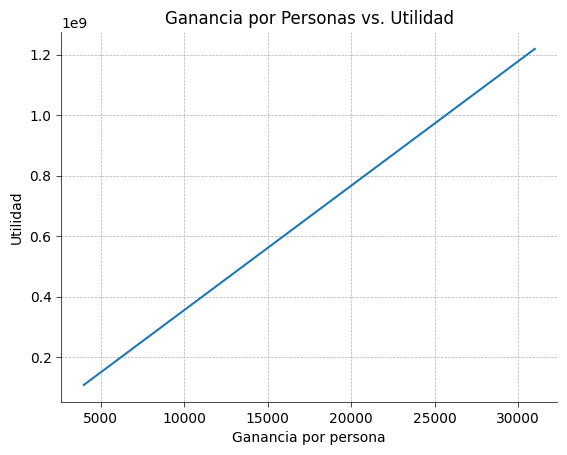

In [113]:
lista_valores_U = list(range(4000, 32000, 1000))

# Crear figura y ejes
fig, ax = plt.subplots()

# Trazar los datos
ax.plot(lista_valores_U, utilidad_cambiando_U)

# Configurar estilo
ax.spines['top'].set_visible(False)  # Ocultar borde superior
ax.spines['right'].set_visible(False)  # Ocultar borde derecho
ax.spines['bottom'].set_linewidth(0.5)  # Grosor del borde inferior
ax.spines['left'].set_linewidth(0.5)  # Grosor del borde izquierdo
ax.tick_params(width=0.5)  # Grosor de las marcas en los ejes
ax.grid(linestyle='--', linewidth=0.5)  # Agregar líneas de cuadrícula

# Etiquetas de los ejes y título
ax.set_xlabel('Ganancia por persona')
ax.set_ylabel('Utilidad')
ax.set_title('Ganancia por Personas vs. Utilidad')

# Mostrar el gráfico
plt.show()